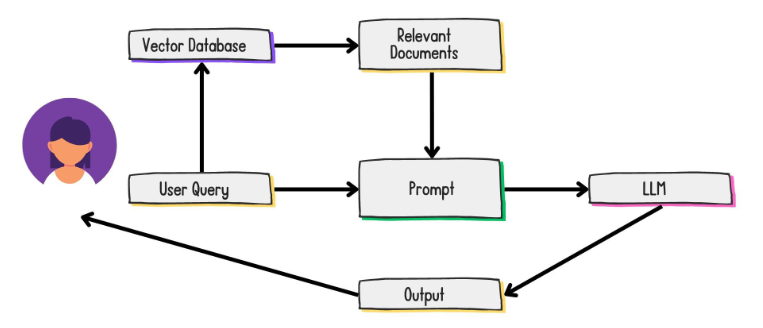

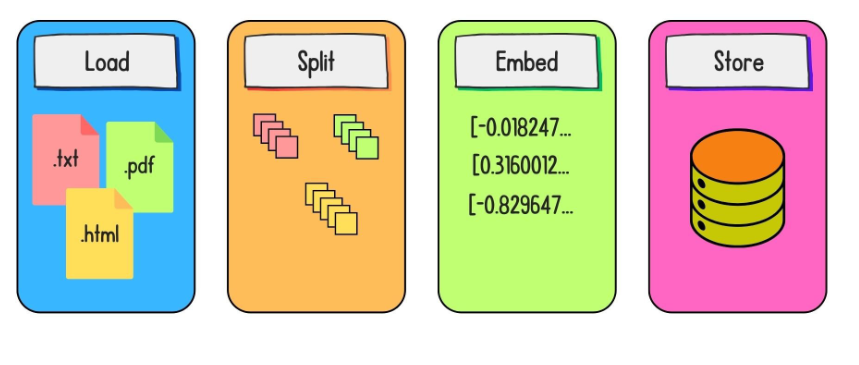

# Data Extraction & Preprocessing

In [53]:
!pip install transformers

In [54]:
!pip install chromadb

In [55]:
!pip install -q -U langchain torch transformers sentence-transformers datasets faiss-cpu

In [56]:
from transformers.pipelines import pipeline

In [57]:
import pandas as pd
import numpy as np
import os
from openpyxl import load_workbook

In [58]:
!pip install -U langchain-community
from langchain.vectorstores import FAISS

In [59]:
!pip install -U unstructured

In [60]:
!pip install fastapi nest_asyncio pyngrok uvicorn
!pip install streamlit sentence_transformers chromadb openai

In [61]:
%pip install -U langchain-google-genai


  Using cached langchain_google_genai-2.1.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
Using cached langchain_google_genai-2.1.7-py3-none-any.whl (47 kB)
Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl (1.4 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15
  Attempting uninstall: langchain-google-genai
    Found existing installation: langchain-google-genai 2.0.10
    Uninstalling langchain-google-genai-2.0.10:
      Successfully uninstalled langchain-google-genai-2.0.10


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [62]:
!pip install requests

In [63]:
!pip install google-generativeai

  Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl.metadata (5.7 kB)
Using cached google_ai_generativelanguage-0.6.15-py3-none-any.whl (1.3 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.18
    Uninstalling google-ai-generativelanguage-0.6.18:
      Successfully uninstalled google-ai-generativelanguage-0.6.18


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.7 requires google-ai-generativelanguage<0.7.0,>=0.6.18, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


In [64]:
#import some Libraries for langchain
from langchain.document_loaders import CSVLoader
from langchain.document_loaders import UnstructuredExcelLoader
from langchain.indexes import VectorstoreIndexCreator
from langchain.indexes import VectorstoreIndexCreator
from langchain.chains import RetrievalQA
from langchain.llms import OpenAI

# Excel

In [65]:
data = pd.read_excel('D:\internship_paysky25\Rag_System\Reviews.xlsx')

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\bosyb\AppData\Local\Temp\ipykernel_7096\2633089760.py:1: SyntaxWarning: invalid escape sequence '\i'
  data = pd.read_excel('D:\internship_paysky25\Rag_System\Reviews.xlsx')


In [66]:
data.head()

,Course Name,Student Name,Timestamp,Rating,Comment
0,Master Python for Data Analysis and Business A...,Gaurav Mehra,2024-08-21 06:46:55+00:00,4.0,NaN
1,Master Python for Data Analysis and Business A...,Harigovind S,2024-08-21 04:35:13+00:00,5.0,NaN
2,Data Literacy and Business Analytics for Busin...,Celine Jayme,2024-08-21 01:42:37+00:00,4.0,NaN
3,Decision Making with Problem Solving & Critica...,Donovan Smith,2024-08-20 20:02:59+00:00,4.0,NaN
4,Econometrics and Statistics for Business in R ...,Mark Stent,2024-08-20 16:59:09+00:00,4.0,NaN


In [67]:
data.describe()

,Rating
count,3889.000000
mean,4.506300
std,0.717774
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Course Name   3889 non-null   object 
 1   Student Name  3803 non-null   object 
 2   Timestamp     3889 non-null   object 
 3   Rating        3889 non-null   float64
 4   Comment       612 non-null    object 
dtypes: float64(1), object(4)
memory usage: 152.0+ KB


don't need to drop any nulls because it's very small in student name and i don't need it so i will drop it, and in the comment it's additional information not drop the column but we can handel it by "no comment" instead of null value.

# Data Cleaning & Transformation

In [69]:
data['Comment'].fillna('No Comment', inplace=True)

C:\Users\bosyb\AppData\Local\Temp\ipykernel_7096\3377109461.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Comment'].fillna('No Comment', inplace=True)


In [70]:
data.dropna(inplace=True)

In [71]:
data.duplicated().sum()

0

In [72]:
data['Student Name'].value_counts()

Student Name
Anonymized User                     257
Joao Costa                            9
Moaz alhomsi                          7
Filip Crncec                          7
Eric Hollis                           6
                                   ... 
Valerie Holden-Stewart                1
Princewill chukwuebuka Okechukwu      1
Sunniva Reiten Bovim                  1
Hossam Eldegwi                        1
Camer AI                              1
Name: count, Length: 3368, dtype: int64

Show in the column of student name not names in the actual life so should clean it.

In [73]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bosyb\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [74]:
def clean_text(text):
    if not isinstance(text, str):
        return text
    # Normalize the text
    text = text.encode('utf-16', 'ignore').decode('utf-16')

    # Remove special characters
    text = re.sub(r'[^\w\s.,!?]', '', text)

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

In [75]:
data['Student Name'] = data['Student Name'].apply(clean_text)

In [76]:
data['Course Name'].value_counts()

Course Name
Master Time Series Analysis and Forecasting with Python 2024    688
Econometrics and Statistics for Business in R & Python          584
Decision Making with Problem Solving & Critical Thinking        582
Data Literacy and Business Analytics for Business Leaders       512
Business Data Analytics & Intelligence with Python              415
Forecasting Models & Time Series Analysis for Business in R     313
Data Mining for Business Analytics & Data Analysis in Python    288
XGBoost for Business: Machine Learning Course in Python & R     224
Statistics for Business Analytics: Data Analysis with Excel     126
Master Python for Data Analysis and Business Analytics 2024      71
Name: count, dtype: int64

In [78]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

In [79]:
#data['Comment'] = data['Comment'].apply(clean_text)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 3888
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Course Name   3803 non-null   object             
 1   Student Name  3803 non-null   object             
 2   Timestamp     3803 non-null   datetime64[ns, UTC]
 3   Rating        3803 non-null   float64            
 4   Comment       3803 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(3)
memory usage: 178.3+ KB


# Chunking Strategy

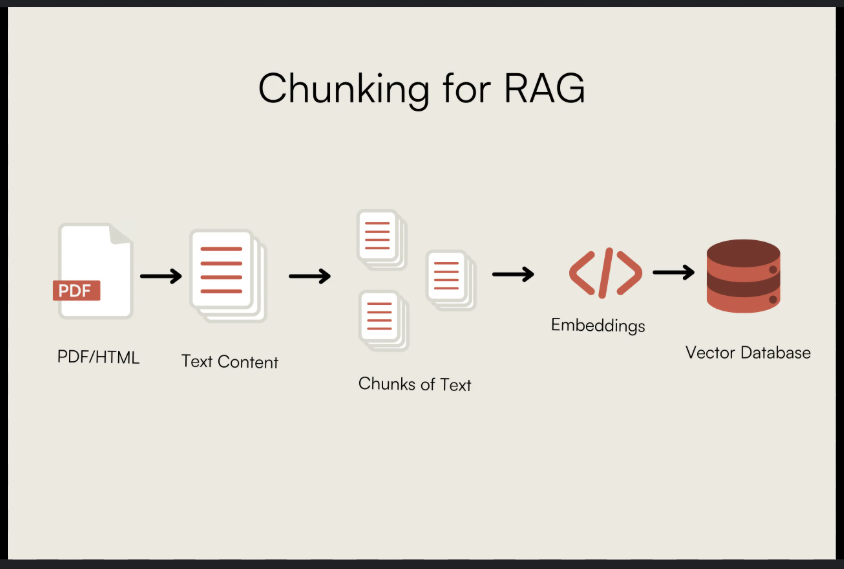

convert the data into small chunks to make it easy for step of embedding

In [82]:
#1- Row-Level Chunking
def row_level_chunking_comments(df):
    chunks = []
    for idx, row in df.iterrows():
        content = f"Course: {row['Course Name']}\n"
        content += f"Student: {row['Student Name']}\n"
        content += f"Rating: {row['Rating']}\n"
        content += f"Comment: {row['Comment']}"

        chunks.append({
            "content": content,
            "metadata": {
                "course_name": row['Course Name'],
                "rating": row['Rating'],
                "timestamp": str(row['Timestamp']),
                "row_index": idx
            }
        })
    return chunks

In [83]:
!pip install tf-keras

In [84]:
!pip install hf_xet

In [85]:
#API_KEY
#For get the API key from geminie or open ai or hugging face
from huggingface_hub import InferenceClient
from sentence_transformers import SentenceTransformer
"""
client = InferenceClient(
    model="sentence-transformers/paraphrase-MiniLM-L6-v2",
    token=".." -> my token from hugging face
)


def get_embedding(text):
    return client.feature_extraction(text)"""

model = SentenceTransformer('all-MiniLM-L6-v2')
#model = SentenceTransformer('intfloat/e5-base-v2') -> mostly using in RAG
#model = SentenceTransformer('paraphrase-mpnet-base-v2') #more accurate than minilm-l6-v2

def get_embedding(text):
    return model.encode(text)

In [86]:
#Embed All Chunks
def embed_chunks(chunks):
    for chunk in chunks:
        chunk["embedding"] = get_embedding(chunk["content"])
    return chunks

# Vector Database Storage

In [87]:
import chromadb
from chromadb.config import Settings

chroma_client = chromadb.Client(Settings(persist_directory="chroma_db", anonymized_telemetry=False))
collection = chroma_client.get_or_create_collection("course_feedback")

def store_embeddings(chunks):
    for i, chunk in enumerate(chunks):
        collection.add(
            ids=[str(i)],
            embeddings=[chunk["embedding"]],
            metadatas=[chunk["metadata"]],
            documents=[chunk["content"]]
        )

In [88]:
chunks = row_level_chunking_comments(data)
chunks = embed_chunks(chunks)
#Vector Database Storage
store_embeddings(chunks)

# Search & Retrieval

In [89]:
#query Chroma for Similar Chunks
def search_and_retrieve(query, top_k=5):
    query_embedding = get_embedding(query)

    reterival_info = collection.query(
        query_embeddings=[query_embedding],
        n_results=top_k,
        include=["documents", "metadatas"]
    )
    documents = reterival_info["documents"][0]
    metadatas = reterival_info["metadatas"][0]

    return documents, metadatas

Just test case for check if work well or not

In [90]:
test = "What do students think about the Python course?"
documents, metadatas = search_and_retrieve(test)

for docs, meta in zip(documents, metadatas):
    print(f"\nFeedback: {docs}")
    print(f"Metadata: {meta}")


Feedback: Course: Business Data Analytics & Intelligence with Python
Student: LoÃc Legros
Rating: 1.0
Comment: Not a good course :
1- some python code are not up to date and doesn't work.
2- the course doesn't add any value compare to the simple reading of either wikipedia article or documentation of python module used. Considered this course as a audio version of those.
3- instructor doesn't really know python and code could easily be improved
4- exercices don't add anything to learning. It's just an opportunity to writte the exact same code you wrote in the theoric part.
5- course info say it's about 15 hours but the course is slowed down (must go to 1.5x speed to have a normal speaking person)
6- video are overly cut to make increase the number of videos but most of them are about 1 min long

If I know that there was not other link with Zero To Mastery but the name, I'd never bought this course.
Metadata: {'course_name': 'Business Data Analytics & Intelligence with Python', 'timest

In [91]:
test_2 = "بقولك ايه الى خد كورس ال python استفاد منه ؟"
documents, metadatas = search_and_retrieve(test_2)

for docs, meta in zip(documents, metadatas):
    print(f"\nFeedback: {docs}")
    print(f"Metadata: {meta}")


Feedback: Course: XGBoost for Business: Machine Learning Course in Python & R
Student: Muhammad Syahmi bin Khairol Anuar
Rating: 5.0
Comment: No Comment
Metadata: {'timestamp': '2021-08-04 02:55:53+00:00', 'row_index': 3467, 'course_name': 'XGBoost for Business: Machine Learning Course in Python & R', 'rating': 5.0}

Feedback: Course: XGBoost for Business: Machine Learning Course in Python & R
Student: Muhammad Rizal Fadhli Wibowo
Rating: 5.0
Comment: No Comment
Metadata: {'course_name': 'XGBoost for Business: Machine Learning Course in Python & R', 'rating': 5.0, 'timestamp': '2021-12-09 05:32:49+00:00', 'row_index': 3313}

Feedback: Course: XGBoost for Business: Machine Learning Course in Python & R
Student: æ_x009d_Žéªæ_x009d_
Rating: 4.5
Comment: No Comment
Metadata: {'rating': 4.5, 'course_name': 'XGBoost for Business: Machine Learning Course in Python & R', 'row_index': 2443, 'timestamp': '2022-12-02 01:29:15+00:00'}

Feedback: Course: XGBoost for Business: Machine Learning Cour

In [92]:
test_3 = "what about the feedback about Decision Making with Problem Solving & Critical Thinking?"

documents, metadatas = search_and_retrieve(test_3)

for docs, meta in zip(documents, metadatas):
    print(f"\nFeedback: {docs}")
    print(f"Metadata: {meta}")


Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Narendran Janardhanan
Rating: 5.0
Comment: No Comment
Metadata: {'rating': 5.0, 'row_index': 689, 'timestamp': '2024-02-21 04:51:35+00:00', 'course_name': 'Decision Making with Problem Solving & Critical Thinking'}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Deborah T
Rating: 1.5
Comment: No Comment
Metadata: {'timestamp': '2024-05-27 19:12:43+00:00', 'rating': 1.5, 'course_name': 'Decision Making with Problem Solving & Critical Thinking', 'row_index': 356}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Helene Franon
Rating: 5.0
Comment: No Comment
Metadata: {'course_name': 'Decision Making with Problem Solving & Critical Thinking', 'rating': 5.0, 'timestamp': '2024-08-14 13:03:38+00:00', 'row_index': 26}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Daniela Codarin
Rating: 4.0
Comment:

In [93]:
test_4 = "what is the average of ratings in course Decision Making with Problem Solving & Critical Thinking?"

documents, metadatas = search_and_retrieve(test_4)

for docs, meta in zip(documents, metadatas):
    print(f"\nFeedback: {docs}")
    print(f"Metadata: {meta}")


Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Hande
Rating: 4.0
Comment: No Comment
Metadata: {'course_name': 'Decision Making with Problem Solving & Critical Thinking', 'timestamp': '2023-06-28 19:07:22+00:00', 'rating': 4.0, 'row_index': 1689}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: äæµ å½å
Rating: 4.0
Comment: No Comment
Metadata: {'course_name': 'Decision Making with Problem Solving & Critical Thinking', 'row_index': 1719, 'rating': 4.0, 'timestamp': '2023-06-25 10:09:11+00:00'}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Jami Lowery
Rating: 2.5
Comment: No Comment
Metadata: {'course_name': 'Decision Making with Problem Solving & Critical Thinking', 'row_index': 820, 'rating': 2.5, 'timestamp': '2024-01-10 15:47:53+00:00'}

Feedback: Course: Decision Making with Problem Solving & Critical Thinking
Student: Deborah T
Rating: 1.5
Comment: No Comment
Metadata: {

from my opinion is work well because it is give the different feedback and it is related to python so it is relvant to main topic related to question

# LLM Integration & Answer Generation

In [94]:
#implement it to make the prompt from retrieved chunks
def generate_prompt(query, documents):
    context = "\n".join(documents)
    prompt = f"""Answer the question based on students' reviews
              Some of the feedback recieved:
              {context}
              question: {query}
              answer:"""
    return prompt

using geminai

In [95]:
!pip uninstall pydantic langchain langchain-core langchain-google-genai -y

Found existing installation: pydantic 2.11.7
Uninstalling pydantic-2.11.7:
  Successfully uninstalled pydantic-2.11.7
Found existing installation: langchain 0.3.26
Uninstalling langchain-0.3.26:
  Successfully uninstalled langchain-0.3.26
Found existing installation: langchain-core 0.3.68
Uninstalling langchain-core-0.3.68:
  Successfully uninstalled langchain-core-0.3.68
Found existing installation: langchain-google-genai 2.1.7
Uninstalling langchain-google-genai-2.1.7:
  Successfully uninstalled langchain-google-genai-2.1.7


In [96]:
!pip install "pydantic>=2.3,<3.0"
!pip install "langchain>=0.1.20"
!pip install langchain-core
!pip install langchain-google-genai

  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
Using cached pydantic-2.11.7-py3-none-any.whl (444 kB)
  Using cached langchain-0.3.26-py3-none-any.whl.metadata (7.8 kB)
  Using cached langchain_core-0.3.68-py3-none-any.whl.metadata (5.8 kB)
Using cached langchain-0.3.26-py3-none-any.whl (1.0 MB)
Using cached langchain_core-0.3.68-py3-none-any.whl (441 kB)
  Using cached langchain_google_genai-2.1.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl.metadata (9.8 kB)
Using cached langchain_google_genai-2.1.7-py3-none-any.whl (47 kB)
Using cached google_ai_generativelanguage-0.6.18-py3-none-any.whl (1.4 MB)
  Attempting uninstall: google-ai-generativelanguage
    Found existing installation: google-ai-generativelanguage 0.6.15
    Uninstalling google-ai-generativelanguage-0.6.15:
      Successfully uninstalled google-ai-generativelanguage-0.6.15


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.


In [97]:
!pip show pydantic
!pip show langchain

Name: pydantic
Version: 2.11.7
Summary: Data validation using Python type hints
Home-page: https://github.com/pydantic/pydantic
Author: 
Author-email: Samuel Colvin <s@muelcolvin.com>, Eric Jolibois <em.jolibois@gmail.com>, Hasan Ramezani <hasan.r67@gmail.com>, Adrian Garcia Badaracco <1755071+adriangb@users.noreply.github.com>, Terrence Dorsey <terry@pydantic.dev>, David Montague <david@pydantic.dev>, Serge Matveenko <lig@countzero.co>, Marcelo Trylesinski <marcelotryle@gmail.com>, Sydney Runkle <sydneymarierunkle@gmail.com>, David Hewitt <mail@davidhewitt.io>, Alex Hall <alex.mojaki@gmail.com>, Victorien Plot <contact@vctrn.dev>
License: 
Location: D:\anaconda\Lib\site-packages
Requires: annotated-types, pydantic-core, typing-extensions, typing-inspection
Required-by: anaconda-auth, chromadb, fastapi, google-generativeai, langchain, langchain-core, langchain-google-genai, langsmith, openai, pydantic-settings, unstructured-client
Name: langchain
Version: 0.3.26
Summary: Building appli

In [98]:
import pydantic
print(pydantic.VERSION)

2.11.7


In [99]:
!pip install langchain-google-genai google-generativeai

INFO: pip is looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using cached google_generativeai-0.8.4-py3-none-any.whl.metadata (4.2 kB)
  Using cached google_generativeai-0.8.3-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.8.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.7.2-py3-none-any.whl.metadata (4.0 kB)
  Using cached google_generativeai-0.7.1-py3-none-any.whl.metadata (3.9 kB)
INFO: pip is still looking at multiple versions of google-generativeai to determine which version is compatible with other requirements. This could take a while.
  Using cached google_generativeai-0.7.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached google_generativeai-0.6.0-py3-none-any.whl.metadata (3.9 kB

In [100]:
!pip install dotenv

In [101]:
from dotenv import load_dotenv
load_dotenv()

import os
from langchain_google_genai import ChatGoogleGenerativeAI
# Set the Google_API key
Google_API_Key = os.getenv('GOOGLE_API_KEY')
llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite-preview-06-17",
                             google_api_key= Google_API_Key)

response = llm.invoke("What do students think about the Master Python course?")
print(response)

content='It\'s impossible to give a single, definitive answer to "What do students think about the Master Python course?" because **there isn\'t one single "Master Python course."**\n\nInstead, there are **countless Python courses** designed for various levels of mastery, delivered by different platforms, instructors, and with different focuses.\n\nHowever, I can provide you with a general overview of what students *typically* think about **well-designed and effective Master Python courses**, based on common feedback and expectations:\n\n**Generally Positive Aspects Students Appreciate:**\n\n*   **Comprehensive Coverage:** Students often praise courses that cover a wide range of advanced Python topics, including:\n    *   Object-Oriented Programming (OOP) in depth.\n    *   Data structures and algorithms.\n    *   Functional programming concepts.\n    *   Advanced libraries and frameworks (e.g., NumPy, Pandas, Django, Flask, FastAPI).\n    *   Concurrency and parallelism (multithreadin

In [102]:
def rag_pipeline(query, k=5):
    # Retrieve relevant documents from the vector database
    retrieved_documents, metadatas = search_and_retrieve(query, top_k=k)

    # Generate the prompt for the LLM using the retrieved documents
    prompt = generate_prompt(query, retrieved_documents)

    # Generate the answer using the language model
    answer = llm.invoke(prompt)

    return answer, retrieved_documents, metadatas

test with llm

In [103]:
test_llm = "What do students think about the Master Python course?"
answer, docs, meta = rag_pipeline(test_llm)
print(f"Answer: {answer.content}") # Access the content attribute of the AIMessage object
print("\nFrom feedback of students:")
for doc, metadata in zip(docs, meta):
    print(f"\nFeedback: {doc}")
    print(f"Metadata: {metadata}")

Answer: Students generally find the "Master Python for Data Analysis and Business Analytics 2024" course to be **amazing, interesting, and very useful for beginners**. They appreciate the teaching style and the mentor, Diogo. One student mentioned being able to finish the course quickly.

However, one student felt that some concepts and applications could benefit from more detailed explanations regarding the reasoning behind certain approaches.

From feedback of students:

Feedback: Course: Master Python for Data Analysis and Business Analytics 2024
Student: Ann Churchill
Rating: 4.5
Comment: Amazing and interesting course. I could finish the course in 2 days. It is very useful course for beginners. Amazing mentor. Loved the way of teaching. Thank you Diogo for this course.
Metadata: {'course_name': 'Master Python for Data Analysis and Business Analytics 2024', 'timestamp': '2021-04-20 10:45:39+00:00', 'rating': 4.5, 'row_index': 3621}

Feedback: Course: Master Time Series Analysis and

In [104]:
test_2_llm = "what student think about Business  course?"

answer, docs, meta = rag_pipeline(test_2_llm)
print(f"Answer: {answer.content}") # Access the content attribute of the AIMessage object
print("\nFrom feedback of students:")
for doc, metadata in zip(docs, meta):
    print(f"\nFeedback: {doc}")
    print(f"Metadata: {metadata}")

Answer: Students generally have a positive view of the "Data Literacy and Business Analytics for Business Leaders" course. They found the content to be well-explained and appropriate in difficulty, with one student specifically mentioning the instructor's lucid explanations and relevant examples. The course appears to meet expectations, with one student looking forward to taking more courses from the same instructor. Another student felt it was a "good match" for them.

From feedback of students:

Feedback: Course: Data Literacy and Business Analytics for Business Leaders
Student: Maxim Weerasinghe
Rating: 4.5
Comment: Finished the course, am satisfied, the content was not easy but also not too complex, the instructor explained everything very well. Overall very nice course.
Metadata: {'row_index': 2664, 'timestamp': '2022-10-12 17:19:40+00:00', 'course_name': 'Data Literacy and Business Analytics for Business Leaders', 'rating': 4.5}

Feedback: Course: Data Literacy and Business Analy

# API & Interface Layer

using streamlit for prototyping,
using fastapi for api framework

In [114]:
#streamlit run web_rag.py

# Monitoring & Optimization

In [ ]:
# done

# Deployment & Infrastructure

In [1]:
# using FastAPI with Streamlit